# Lights Out 

In this presentation, I cover:

- The mechanics of the Lights Out game
- A playable demo (Matplotlib for visualizations)
- Solving the game (RREF over $\mathbb{Z}_2$)
- *Solvability* of a game
- (crux.) Size and Shape doesn't matter
- Create your own lights out grid, and have the program solve it!
- Proof for existence of a solution

This presentation is heavily inspired from this [video](https://www.youtube.com/watch?v=1izbpSk3ays), and a [chapter](https://njohnston.ca/lights_out.pdf) on the same topic; both produced by [Nathaniel Johnston](https://njohnston.ca/). 

## Mechanics of the Game

In Lights-Out, there is a grid (typically square) with lights in each square. Each light can be in either of $2$ states - `on` or `off`. The game starts with some configuration of these lights.

The goal in Lights-Out is to turn all these lights off. The user has the ability to select lights to turn on/off. But there's a catch!

Turning on/off a light also affects its orthogonal "neighbours". The effect is to flip the neighbour's states too.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lights_out import *
from canvas import *

### Demo

Run the code-cell below to play the $3 \times 3$ Lights Out game! 

Input the name/label of the button you want to press. 

The inputs terminate when the puzzle is solved (when all the lights are off). 

If you want to give up, input $-1$.

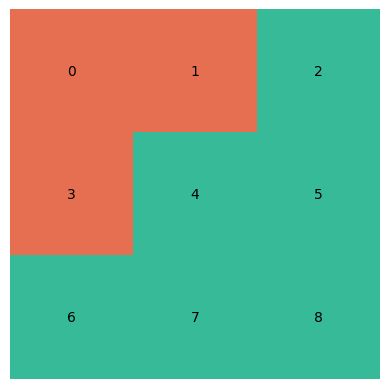

Enter button label to press: -1
Giving up...


In [15]:
env = LightsOut([(i, j) for i in range(3) for j in range(3)])
env.play()

If you were unable to solve the $3 \times 3$ grid and would like to know a *possible* solution sequence, use `LightsOut.solve()`

In [16]:
env.solve()

array([0, 2, 4, 6, 8])

Here's an example on the $5 \times 5$ lights out grid. The `LightsOut.illustrate_solution()` method generates an animation of a possible solution:

In [4]:
env = LightsOut([(i, j) for i in range(5) for j in range(5)])
print('Move Sequence:', ', '.join(env.solve().astype(str)))
env.illustrate_solution(label=True)

Move Sequence: 1, 2, 4, 6, 7, 8, 12, 13, 14, 15, 16, 18, 19, 20, 21


## Solving the Game

For now, lets consider the $3 \times 3$ grid to illustrate the solution. The method can then be generalized as well.

In [32]:
env = LightsOut([(i, j) for i in range(3) for j in range(3)])

### Encoding the configuration and actions

The states of the 9 lights are firstly encoded in binary- $0$ for `off` and $1$ for `on`. These values are then populated into a 9-dimensional vector over $\mathbb{Z}_2$

By doing this, actions (button presses) can now be represented by vector addition. Each button press will correspond to a vector of $0$s and $1$s, where the presence of a $1$ indicates that that particular light is an orthogonal neighbour and hence, is also afected by the action.

For example, the vector toggling button $4$ (let's call it $\mathbf{a_4}$) corresponds to:

$$
\mathbf{a_4} = (0, 1, 0, 1, 1, 1, 0, 1, 0)
$$

Since pressing button $4$ affects itself, and also its orthogonal neighbours $1$, $3$, $5$, and $7$.

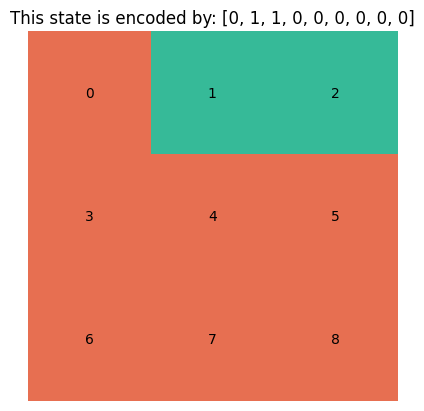

In [22]:
config = GF(np.random.choice([0, 1], size=9))
env.displane(config, config=True)
plt.title((f'This state is encoded by: [{", ".join(np.array(config).astype(str))}]'))
plt.show()

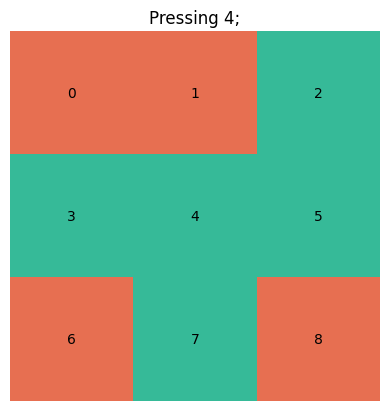

In [23]:
four = GF(np.array([0, 1, 0, 1, 1, 1, 0, 1, 0]))
env.displane(config+four, config=True)
plt.title((f'Pressing 4;'))
plt.show()

**Fact:** The solution only depends on which buttons are pressed.

*Why?*
- If we focus solely on *just one* button, then its state at the end of the game **only** depends on its starting state, and how many times it was pressed. Not the order.
- No solution may *require* us to press a button more than once, since pressing a button is the equivalent to not pressing at all. (This observation also re-inforces our choice of $\mathbb{Z}_2$)

### Formulating the problem

Let $\mathbf{v_s}$ and $\mathbf{v_e}$ denote the starting and intended final configurations respectively, and let $\mathbf{a_i}$ denote the $9$ different actions for our $3 \times 3$ grid. Then our goal is to find $x_1, x_2, \cdots, x_9$ such that:

\begin{align}
\mathbf{v_s} + (x_1\mathbf{a_1} + x_2\mathbf{a_2} + \cdots + x_9\mathbf{a_9}) &= \mathbf{v_c}, \quad \text{or} \\
x_1\mathbf{a_1} + x_2\mathbf{a_2} + \cdots + x_9\mathbf{a_9} &= \mathbf{v_e} - \mathbf{v_s}
\end{align}

This is a system of linear equations. Taking $A = [\mathbf{a_1} | \mathbf{a_2} | \cdots | \mathbf{a_9}]$ we can rewrite the above system as 

$$
A\mathbf{x} = \mathbf{v_e} - \mathbf{v_s}
$$

For our $3 \times 3$ case, the matrix $A$ looks something like this (dots are used in-place of 0s for readability):

In [33]:
arr = np.array(env.action_matrix).astype(str)
arr[arr == '0'] = '.'
for arr1 in arr:
    print(' '.join(arr1))

1 1 . 1 . . . . .
1 1 1 . 1 . . . .
. 1 1 . . 1 . . .
1 . . 1 1 . 1 . .
. 1 . 1 1 1 . 1 .
. . 1 . 1 1 . . 1
. . . 1 . . 1 1 .
. . . . 1 . 1 1 1
. . . . . 1 . 1 1


### Solving the problem

Let $\mathbf{v_s} = 1$ and $\mathbf{v_e} = 0$ i.e, we start with the "all-lights on" configuration, and need to turn all the lights off to solve the game. Equivalently, we need to solve the linear system $A\mathbf{x} = \mathbf{v_e}-\mathbf{v_s} = 1$

We construct the augmented matrix $[A | 1]$, and obtain its reduced row-echelon form:

In [25]:
env.solve();

arr, right = np.array(env.A[:, :-1]).astype(str), np.array(env.A[:, -1]).astype(str)
arr[arr == '0'], right[right == '0'] = '.', '.'
for (arr1, right1) in zip(arr, right):
    print(' '.join(arr1), '|', right1)

1 1 . 1 . . . . . | 1
1 1 1 . 1 . . . . | 1
. 1 1 . . 1 . . . | 1
1 . . 1 1 . 1 . . | 1
. 1 . 1 1 1 . 1 . | 1
. . 1 . 1 1 . . 1 | 1
. . . 1 . . 1 1 . | 1
. . . . 1 . 1 1 1 | 1
. . . . . 1 . 1 1 | 1


In [26]:
arr, right = np.array(env.A_rref[:, :-1]).astype(str), np.array(env.A_rref[:, -1]).astype(str)
arr[arr == '0'], right[right == '0'] = '.', '.'
for (arr1, right1) in zip(arr, right):
    print(' '.join(arr1), '|', right1)

1 . . . . . . . . | 1
. 1 . . . . . . . | .
. . 1 . . . . . . | 1
. . . 1 . . . . . | .
. . . . 1 . . . . | 1
. . . . . 1 . . . | .
. . . . . . 1 . . | 1
. . . . . . . 1 . | .
. . . . . . . . 1 | 1


From the above, setting $\mathbf{x} = (1, 0, 1, 0, 1, 0, 1, 0, 1)$ (corresponding to the $0$th, $2$nd, $4$th, $6$th and $8$th actions) is a solution for the $3 \times 3$ Lights Out puzzle.

Note that in this case, the reduced row-echelon form has the identity matrix on the left (hence full rank), which indicates that a solution *always exists* (alternatively, any starting configuration is always winnable). This may not always happen.

Question: What are the number of starting configurations that are winnable in the $3 \times 3$ case?

Any starting configuration is winnable; so there are $2^9$ winnable configurations.

### Is the problem always solvable?



Let's again consider the $5 \times 5$ case, and obtain the row-reduced echelon form of its action matrix:

In [35]:
env = LightsOut([(i, j) for i in range(5) for j in range(5)])
env.solve();

arr, right = np.array(env.A_rref[:, :-1]).astype(str), np.array(env.A_rref[:, -1]).astype(str)
arr[arr == '0'], right[right == '0'] = '.', '.'
for (arr1, right1) in zip(arr, right):
    print(' '.join(arr1), '|', right1)

1 . . . . . . . . . . . . . . . . . . . . . . . 1 | .
. 1 . . . . . . . . . . . . . . . . . . . . . 1 . | 1
. . 1 . . . . . . . . . . . . . . . . . . . . 1 1 | 1
. . . 1 . . . . . . . . . . . . . . . . . . . 1 . | .
. . . . 1 . . . . . . . . . . . . . . . . . . . 1 | 1
. . . . . 1 . . . . . . . . . . . . . . . . . 1 1 | .
. . . . . . 1 . . . . . . . . . . . . . . . . . . | 1
. . . . . . . 1 . . . . . . . . . . . . . . . 1 1 | 1
. . . . . . . . 1 . . . . . . . . . . . . . . . . | 1
. . . . . . . . . 1 . . . . . . . . . . . . . 1 1 | .
. . . . . . . . . . 1 . . . . . . . . . . . . 1 . | .
. . . . . . . . . . . 1 . . . . . . . . . . . 1 . | .
. . . . . . . . . . . . 1 . . . . . . . . . . . . | 1
. . . . . . . . . . . . . 1 . . . . . . . . . 1 . | 1
. . . . . . . . . . . . . . 1 . . . . . . . . 1 . | 1
. . . . . . . . . . . . . . . 1 . . . . . . . 1 1 | 1
. . . . . . . . . . . . . . . . 1 . . . . . . . . | 1
. . . . . . . . . . . . . . . . . 1 . . . . . 1 1 | .
. . . . . . . . . . . . . . 

Observe that there are $2$ "trailing" vectors that are not part of the leading pivot matrix (free variables).

Let's take the trailing columns (corresponding to $23$, and $24$) of the matrix and visualize it's move sequence:

In [36]:
move_seq = [i for i in range(env.n) if env.A_rref[:, -3][i]]
print(move_seq)
env.illustrate_moves(move_seq, label=True)

[1, 2, 3, 5, 7, 9, 10, 11, 13, 14, 15, 17, 19, 21, 22]


In [29]:
move_seq = [i for i in range(env.n) if env.A_rref[:, -2][i]]
print(move_seq)
env.illustrate_moves(move_seq, label=True)

[0, 2, 4, 5, 7, 9, 15, 17, 19, 20, 22]


Note that this move sequence is exactly equivalent to pressing buttons 23 and 24 once. Buttons 23 and 24 therefore become *redundant*, since there exist some other combination of buttons that yield the exact same effect.

**Question**: What are the number of starting configurations that are winnable in the $5 \times 5$ case?

In the $5 \times 5$ case, we have 2 free-variables; buttons 24 and 25. Therefore using a certain solution for rhe game, we can generate 3 more solutions by choosing whether to press or not press buttons 24 and 25.

Therefore, only $2^{25}/2^{2} = 2^{23}$ starting configurations are solvable.

The implication is that there may exist certain initial configurations that are not solvable.

However, there is a neat result:

The all $1$s configuration is **always** solvable!

**Always**; irrespective of the size, or even the shape of the `LightsOut` grid! 

We'll prove this lemma at the end of this presentation. But let's experiment with this freedom of size and shape of our level first:

## Size and Shape doesn't matter!

We can use the same row-reduction method discussed earlier on grids with any shape and size! 

Try solving the below *traingular* puzzle. Remember, you can always give up by passing `-1` as the input.

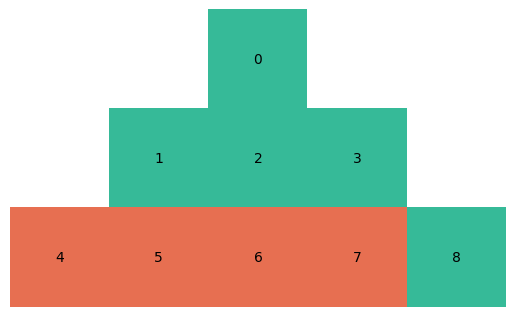

Enter button label to press: -1
Giving up...


In [10]:
initial_state = state=GF([1, 1, 1, 1, 0, 0, 0, 0, 1])
env = LightsOut([(0, 2), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4)])
env.play(state=initial_state)

In [11]:
print(env.solve(state=initial_state))
env.illustrate_solution(label=True, state=initial_state)

[0 1 6 7]


## Create your own `LightsOut` level!

Draw your level here...

...and have the program solve it here!

In [2]:
canvas

Canvas(image_data=b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf4\x00\x00\x01\xf4\x08\x06\x00\x00\x00\xc…

In [12]:
grid = (canvas.get_image_data().sum(axis=2)[:,:int(0.95*width)][::marker_size, ::marker_size] > 0).astype(int)
grid = [(i, j) for i in range(grid.shape[0]) for j in range(grid.shape[1]) if grid[(i, j)]]

env = LightsOut(grid)
env.illustrate_solution()

# Proof